#### Import the libraries

In [1]:
# For cleaning and preparing the dataset
# -> dataframe manipulation
# -> text manipulation
# -> Web Scrapping

import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests
import re

import random


# Module to serialize the content produced from the execution of the code

import pickle


# Module to monitor the progress of a python for loop

from tqdm import tqdm


# Module to manipulate text in python - NLTK package

import nltk
from nltk import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords


# Module to compute word vectorizers and compute the cosine distance

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_distances

# from IPython.core.display import display, HTML
# display(HTML("<style>.container { width:70% !important; }</style>"))

#### Keras Text Classification (For creating the word embeddings)

In [2]:
from nltk.stem import WordNetLemmatizer

from tensorflow.python.keras.preprocessing.text import Tokenizer
from tensorflow.python.keras.preprocessing.sequence import pad_sequences

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer

from time import time

from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

from keras.models import model_from_json
from keras.models import load_model

from tensorflow.python.keras.layers import Embedding, Flatten, Dense
from tensorflow.python.keras.models import Sequential

import matplotlib.pyplot as plt
from pylab import rcParams

Using TensorFlow backend.


In [189]:
dataset_with_embeddings['Movie Title'][dataset_with_embeddings['Movie Title'] == 'Solo für 2'] = "All of Me"

dataset_with_embeddings['Movie Title'][dataset_with_embeddings['Movie Title'] == 'Die letzte Metro'] = "The Last Metro"

dataset_with_embeddings['Movie Title'][dataset_with_embeddings['Movie Title'] == 'Die letzte Metro'] = "The Last Metro"

In [197]:
dataset_with_embeddings['Actors'][dataset_with_embeddings['Movie Title'] == 'heißblütig  kaltblütig']

Series([], Name: Actors, dtype: object)

#### Import the dataset

In [158]:
dataset = pd.read_pickle('dataset_part_2_07112019.pkl') # previous version "dataset_30102019.pkl"

dataset['Movie Title'][dataset['Movie Title'] == 'Das Geheimnis meines Erfolges'] = "The Secret of My Success"

dataset['Movie Title'][dataset['Movie Title'] == 'Alles unter Kontrolle - Keiner blickt durch'] = "Carry On Up the Khyber"

dataset['Movie Title'][dataset['Movie Title'] == 'Fire with Fire - Verbotene Leidenschaft'] = "Bed of Roses"

dataset['Movie Title'][dataset['Movie Title'] == 'Das Rosenbett'] = "Fire with Fire"

empty_list_tv = []

# On 07.11.2019 I noticed that some titles in my dataset had the words "TV-Mini Series" & "TV Movies" thus I decided to remove them

# In order for the change to take effect I should retrain the Keras Classifiers again!

for i in dataset['Movie Title']:
    if 'TV' in i: 
        empty_list_tv.append(i)
    else:
        pass

print("The number of the rows that are TV productions is: {}".format(len(empty_list_tv)))

print("\nThus, the 463 rows (movies) should be deleted since I don't want my algorithm to propose TV Series or TV Movies!")

dataset = dataset[~dataset['Movie Title'].isin(empty_list_tv)]

# Split the y variable ("Genres") to one hot encoded columns
mlb = MultiLabelBinarizer()
dataset = dataset.join(pd.DataFrame(mlb.fit_transform(dataset['Genres']),
                                    columns=mlb.classes_,
                                    index=dataset.index))

print("\nThe shape of the dataset that will be used in Keras classifier is: {}".format(dataset.shape))

dataset.head()

The number of the rows that are TV productions is: 463

Thus, the 463 rows (movies) should be deleted since I don't want my algorithm to propose TV Series or TV Movies!

The shape of the dataset that will be used in Keras classifier is: (10139, 37)


,Movie Title,IMDB Url,IMDB Rating,Actors,Director,Plot Summary,Plot Keywords,Genres,Combined_Features,Actors_Embeddings,...,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western
0,Avatar,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,7.8,"[Sam Worthington, Zoe Saldana, Sigourney Weave...",James Cameron,A paraplegic Marine dispatched to the moon Pan...,"[avatar, future, marine, native, paraplegic]","[Action, Adventure, Fantasy]",avatar sam worthington zoe saldana sigourney w...,"Sam Worthington, Zoe Saldana, Sigourney Weaver...",...,0,0,0,0,0,0,0,0,0,0
1,Pirates of the Caribbean: At World's End,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,7.1,"[Johnny Depp, Geoffrey Rush, Orlando Bloom, Ke...",Gore Verbinski,Captain Barbossa Will Turner and Elizabeth Swa...,"[goddess, marriage, ceremony, marriage, propos...","[Action, Adventure, Fantasy]",pirates of the caribbean: at world's end johnn...,"Johnny Depp, Geoffrey Rush, Orlando Bloom, Kei...",...,0,0,0,0,0,0,0,0,0,0
2,Spectre,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,6.8,"[Daniel Craig, Christoph Waltz, Léa Seydoux, R...",Sam Mendes,A cryptic message from 007's past sends him pi...,"[bomb, espionage, sequel, spy, terrorist]","[Action, Adventure, Thriller]",spectre daniel craig christoph waltz léa seydo...,"Daniel Craig, Christoph Waltz, Léa Seydoux, Ra...",...,0,0,0,0,0,0,0,1,0,0
3,The Dark Knight Rises,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,8.4,"[Christian Bale, Gary Oldman, Tom Hardy, Josep...",Christopher Nolan,Eight years after the Joker's reign of anarchy...,"[deception, imprisonment, lawlessness, police,...","[Action, Thriller]",the dark knight rises christian bale gary oldm...,"Christian Bale, Gary Oldman, Tom Hardy, Joseph...",...,0,0,0,0,0,0,0,1,0,0
4,John Carter,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,6.6,"[Taylor Kitsch, Lynn Collins, Samantha Morton,...",Andrew Stanton,Transported to Barsoom a Civil War vet discove...,"[alien, american, civil, war, male, nipple, ma...","[Action, Adventure, Sci-Fi]",john carter taylor kitsch lynn collins samanth...,"Taylor Kitsch, Lynn Collins, Samantha Morton, ...",...,0,0,0,1,0,0,0,0,0,0


#### Understand the dependent variable: Genres of each movie

The label of each Genre (one hot encoded):


   Action  Adult  Adventure  Animation  Biography  Comedy  Crime  Documentary  \
0       1      0          1          0          0       0      0            0   
1       1      0          1          0          0       0      0            0   
2       1      0          1          0          0       0      0            0   
3       1      0          0          0          0       0      0            0   
4       1      0          1          0          0       0      0            0   

   Drama  Family  ...  News  Reality-TV  Romance  Sci-Fi  Short  Sport  \
0      0       0  ...     0           0        0       0      0      0   
1      0       0  ...     0           0        0       0      0      0   
2      0       0  ...     0           0        0       0      0      0   
3      0       0  ...     0           0        0       0      0      0   
4      0       0  ...     0           0        0       1      0      0   

   Talk-Show  Thriller 

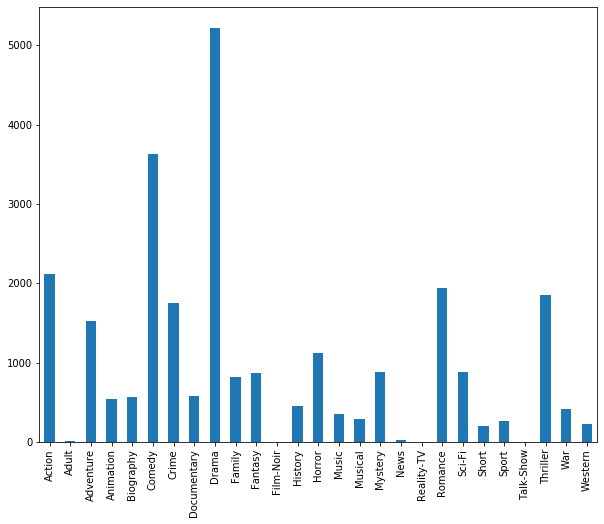

In [159]:
genre_labels = dataset[['Action', 'Adult', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama', 
                        'Family', 'Fantasy', 'Film-Noir', 'History', 'Horror', 'Music', 'Musical', 'Mystery', 
                        'News', 'Reality-TV', 'Romance', 'Sci-Fi', 'Short', 'Sport', 'Talk-Show', 'Thriller', 'War', 'Western']]

print("The label of each Genre (one hot encoded):")
print('\n')
print(genre_labels.head())

print("\n---------------------------------------------------------------------------------")

print('\nThe distribution of the genre labels (frequency plot)')
fig_size = plt.rcParams["figure.figsize"]

fig_size[0] = 10

fig_size[1] = 8

plt.rcParams["figure.figsize"] = fig_size

genre_labels.sum(axis=0).plot.bar()

#### Pickle the unique genre tags for later use

In [67]:
unique_genres = genre_labels.columns.tolist()

len(unique_genres)

with open('genres_list_05112019.pkl', 'wb') as f:
    pickle.dump(unique_genres, f)

In [ ]:
with open('genres_list_05112019.pkl', 'rb') as f:
    genres_list = pickle.load(f)

#### Model 1: Actors


The first Upper Case line of the column Actors: 
 ['Sam Worthington', 'Zoe Saldana', 'Sigourney Weaver', 'Stephen Lang', 'Michelle Rodriguez', 'Giovanni Ribisi', 'Joel David Moore', 'CCH Pounder', 'Wes Studi', 'Laz Alonso', 'Dileep Rao', 'Matt Gerald', 'Sean Anthony Moran', 'Jason Whyte', 'Scott Lawrence']

The first Lower Case line of the column Actors: 
 ['sam worthington', 'zoe saldana', 'sigourney weaver', 'stephen lang', 'michelle rodriguez', 'giovanni ribisi', 'joel david moore', 'cch pounder', 'wes studi', 'laz alonso', 'dileep rao', 'matt gerald', 'sean anthony moran', 'jason whyte', 'scott lawrence']

First value of variable X: Movie Title                                                Avatar
clean_actors    [sam worthington, zoe saldana, sigourney weave...
Genres                               [Action, Adventure, Fantasy]
Name: 0, dtype: object

First value of variable y: 
 [1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Tokenize the dataset


c:\users\spano\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\users\spano\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



The number of most frequent actors is: 20001

---------------------------------------------------------------------------------

Specify the length of the maxlen variable (insert into the padding execution)

Max Length of the pad sequence: 15

 An example of an X_train sequence of words: [16412 16413 16414 16415 16416 16417 16418 16419 16420 16421 16422 16423
 16424 16425 16426]

 An example of an X_test sequence of words: [  711    19    40  1851   340  1368  2047    58 20001  3549   218  1128
 20001  9756  2128]

X train shape: (8111, 15)
y train shape: (8111, 27)

X test shape: (2028, 15)
y test shape: (2028, 27)

---------------------------------------------------------------------------------

Create the Keras Classification Model


Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 15, 100)           2000200   
_______________________________

100%|█████████████████████████████████████████████████████████████████████████| 10139/10139 [00:00<00:00, 15944.70it/s]



---------------------------------------------------------------------------------

Evaluate the classification model



Test Score: 0.2691145808503943

Test Accuracy: 0.9163198

---------------------------------------------------------------------------------

Plot the model's accuracy & loss


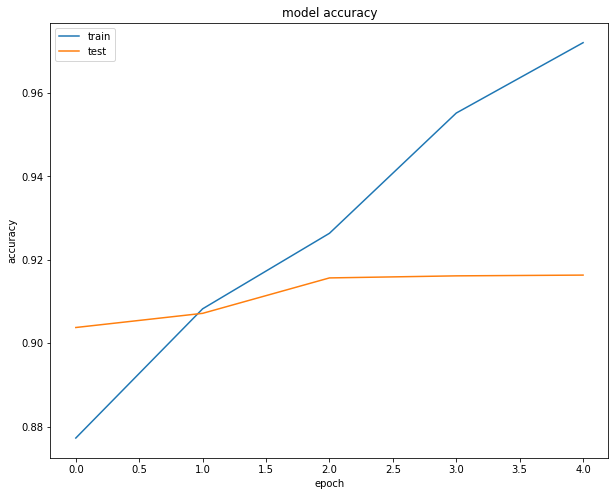

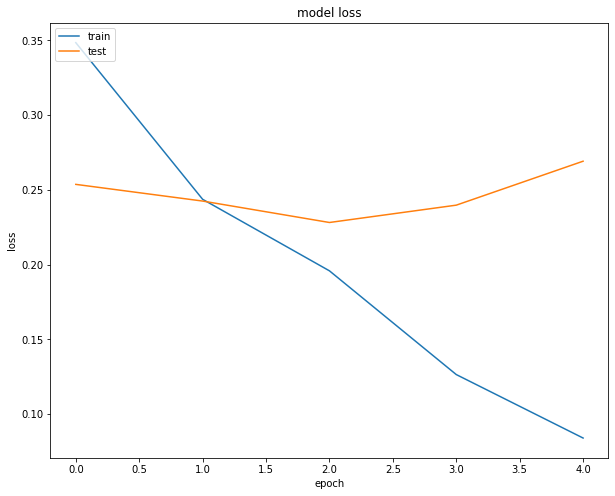


---------------------------------------------------------------------------------

Predict the genre tags of new movie's actors


Movie Title: KillerLady - My wife Is a Gangster 3 

Predicted Genre labels: ['Action', 'Drama', 'Thriller'] 

With predicted probabilities: [0.27481738 0.44519812 0.7695786 ] 

The actual Genre labels: ['Action', 'Comedy', 'Drama'] 

 ---------------------------------------------------------------------------------------------------------


Movie Title: Lovely & Amazing 

Predicted Genre labels: ['Comedy', 'Drama', 'Romance'] 

With predicted probabilities: [0.48056474 0.5041943  0.9008838 ] 

The actual Genre labels: ['Comedy', 'Drama', 'Romance'] 

 ---------------------------------------------------------------------------------------------------------


Movie Title: Highlander 

Predicted Genre labels: ['Action', 'Adventure', 'Sci-Fi'] 

With predicted probabilities: [0.20636153 0.25898466 0.8278843 ] 

The actual Genre labels: ['Action', 'Adventure', '

In [137]:
class Config:
    MAX_FEATURES = 20000 ## Ask professor Louridas for this,...had a great problem

    # Keras Classification Model variables
    BATCH_SIZE = 32
    NB_EPOCHS = 5
    EMB_DIMENSIONS = 100
    
actors_list = []

for i in range(len(dataset['Actors'])):
    actors_list.append([element.lower() for element in dataset['Actors'].iloc[i]])
    
dataset['clean_actors'] = actors_list

print('\nThe first Upper Case line of the column Actors: \n', dataset['Actors'].iloc[0])
print('\nThe first Lower Case line of the column Actors: \n', dataset['clean_actors'].iloc[0])

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# Split the dataset into train & validation set

X = dataset[['Movie Title', 'clean_actors', 'Genres']]
y = genre_labels.values

print("\nFirst value of variable X:", X.iloc[0])

print("\nFirst value of variable y: \n", y[0])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# Tokenize the dataset
print("Tokenize the dataset")

actors_tokenizer = Tokenizer(num_words=Config.MAX_FEATURES, lower=True, split=',', oov_token = '<OOV>')
actors_tokenizer.fit_on_texts(list(X_train['clean_actors']))

actors_tokenizer.word_index = {e:i for e,i in actors_tokenizer.word_index.items() if i <= Config.MAX_FEATURES} # <= because tokenizer is 1 indexed

actors_tokenizer.word_index[actors_tokenizer.oov_token] = Config.MAX_FEATURES + 1

X_train['actors_seqs'] = actors_tokenizer.texts_to_sequences(X_train['clean_actors'])
X_test['actors_seqs'] = actors_tokenizer.texts_to_sequences(X_test['clean_actors'])

# vocab_size_unique_actors = len(actors_tokenizer.word_index) + 1 # I use the plus 1 since tokenizer starts from index 1
# print('The number of unique actors is: {}'.format(vocab_size_unique_actors))
# these are my unique actors from 75000 actors I have 63685 unique. Thus, some of my actors are present in more than 1 movie!

vocab_size_frequent_actors = len(actors_tokenizer.word_index) + 1 # I use the plus 1 since tokenizer starts from index 1
print('\nThe number of most frequent actors is: {}'.format(vocab_size_frequent_actors))

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# Specify the length of the maxlen variable
print("\n---------------------------------------------------------------------------------")
print("\nSpecify the length of the maxlen variable (insert into the padding execution)")

all_train_lengths =  list(X_train.actors_seqs.apply(len))

maxlen = int(np.percentile(all_train_lengths, q=90))

print('\nMax Length of the pad sequence: {}'.format(maxlen))

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

X_train_seq = pad_sequences(X_train['actors_seqs'], padding='post', maxlen=maxlen)
X_test_seq = pad_sequences(X_test['actors_seqs'], padding='post', maxlen=maxlen)

print("\n An example of an X_train sequence of words: {}".format(X_train_seq[0]))
print("\n An example of an X_test sequence of words: {}".format(X_test_seq[0]))

print('\nX train shape: {}'.format(X_train_seq.shape))
print('y train shape: {}'.format(y_train.shape))

assert len(X_train_seq) == len(y_train)

print('\nX test shape: {}'.format(X_test_seq.shape))
print('y test shape: {}'.format(y_test.shape))

assert len(X_test_seq) == len(y_test)

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# Setting the Keras Classification Model
print("\n---------------------------------------------------------------------------------")
print("\nCreate the Keras Classification Model")
print("\n")

model_1 = Sequential()

model_1.add(Embedding(input_dim=vocab_size_frequent_actors + 1, # param input_dim: Total number of words to be used by the model 
                      # I will either have input_dim = vocab_size+ (63385 actors) or MAX_FEATURES = 20000 (Most common actors)
                      output_dim=Config.EMB_DIMENSIONS, # param output_dim: The size of the embeddings vector.
                      embeddings_initializer='uniform',
                      mask_zero=False,
                      input_length=maxlen))

model_1.add(Flatten())

model_1.add(Dense(32,
                  activation='relu'))

model_1.add(Dense(27,
                  activation='sigmoid'))

print(model_1.summary())

model_1.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['acc'])

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# Creating a callback function to save the model when a better validation loss is achieved
print("\n---------------------------------------------------------------------------------")
print("\nEnsemble a callback function")

weights_fname = 'model_cast.h5'

try:
    model_1.load_weights(weights_fname)
except:
    print('\nPre-trained weights not found. Fitting from start')
    pass

monitor_metric = 'val_loss'

callbacks = [
    EarlyStopping(monitor=monitor_metric,
                  patience=3,
                  verbose=1,
                  restore_best_weights=True),

    ModelCheckpoint(filepath=weights_fname,
                    monitor=monitor_metric,
                    verbose=1,
                    save_best_only=True,
                    save_weights_only=True)
]

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# Fitting the Keras classification model on the train dataset
print("\n---------------------------------------------------------------------------------")
print("\nFit the keras classification model")
print("\n")

s = time()

fit_model_1 = model_1.fit(X_train_seq, y_train, 
                          epochs=Config.NB_EPOCHS,
                          verbose = 2,
                          batch_size=Config.BATCH_SIZE,
                          validation_data=(X_test_seq, y_test),
                          callbacks=callbacks)

duration = time() - s
print("\nTraining time finished. Duration {} secs".format(duration))

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# Save the trained model
print("\n---------------------------------------------------------------------------------")
print("\nSave the Model")

model_json = model_1.to_json()

with open("model_cast.json", "w") as json_file:
    json_file.write(model_json)

# serialize weights to HDF5
model_1.save_weights("model_cast.h5")
print("\nModel's weights are saved")

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# Extract the word embeddings of the actors
print("\n---------------------------------------------------------------------------------")
print("\nExtract the word embeddings")

embeddings_actors = model_1.layers[0].get_weights()[0]

words_embeddings_actors = {w:embeddings_actors[idx] for w, idx in actors_tokenizer.word_index.items() if idx <= Config.MAX_FEATURES+1}
print("\nThe word embedding vector of the actor 'Johnny Depp' is:\n\n", words_embeddings_actors['johnny depp'])

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# Assign the word embeddings to each different actor
print("\n---------------------------------------------------------------------------------")
print("\nAssign the word embeddings to each different actor")

average_vector_list_cast = []

min_vector_list_cast = []

max_vector_list_cast = []

actors_embeddings_list = []

for i in tqdm(range(len(dataset.index))):
    actors = dataset["clean_actors"].iloc[i]
    
    assert [word.islower() for word in actors] # assert that all actors are present in lower case
    
    actors_embeddings_list.append([words_embeddings_actors[word] if word in words_embeddings_actors else words_embeddings_actors['<OOV>'] for word in actors])
    
dataset['actors_embeddings_list'] = actors_embeddings_list

for i in tqdm(range(len(dataset.index))):
    actor_embeddings = dataset["actors_embeddings_list"].iloc[i]
    
    minimum = np.min([element for element in actor_embeddings], axis=0)
    maximum = np.max([element for element in actor_embeddings], axis=0)
    average = np.mean([element for element in actor_embeddings], axis=0)
    
    min_vector_list_cast.append(minimum)
    max_vector_list_cast.append(maximum)
    average_vector_list_cast.append(average)

dataset['minimum_cast_vectors'] = min_vector_list_cast
dataset['maximum_cast_vectors'] = max_vector_list_cast
dataset['average_cast_vectors'] = average_vector_list_cast

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# Evaluate the model
print("\n---------------------------------------------------------------------------------")
print("\nEvaluate the classification model")
print("\n")

score = model_1.evaluate(X_test_seq, y_test, verbose=0)

print('\nTest Score:', score[0])

print('\nTest Accuracy:', score[1])

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# Plot keras model accuracy & loss
print("\n---------------------------------------------------------------------------------")
print("\nPlot the model's accuracy & loss")

plt.plot(fit_model_1.history['acc'])
plt.plot(fit_model_1.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(fit_model_1.history['loss'])
plt.plot(fit_model_1.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

# Predict the genre tags on new data
print("\n---------------------------------------------------------------------------------")
print("\nPredict the genre tags of new movie's actors")

def predict_the_genre_labels_from_cast(indx):
    
    # get the predicted genre tags
    
    test_sequence = X_test_seq[indx:indx+1]
    
    text_prediction = model_1.predict(test_sequence)
    
    [float(i) for i in text_prediction[0]]
    
    tag_probabilities = text_prediction[0][np.argsort(text_prediction[0])[-3:]]
    
    indexes = np.argsort(text_prediction[0])[::-1][:3]

    predicted_tags = []
    
    for i, tag in enumerate(genres_list):
        if i in indexes:
            predicted_tags.append(genres_list[i])
    
    # -----------------------------------------------------------------------------------
    
    return print('\n\nMovie Title: {}'.format(X_test['Movie Title'].iloc[indx]), '\n\nPredicted Genre labels: {}'.format(predicted_tags), '\n\nWith predicted probabilities: {}'.format(tag_probabilities), '\n\nThe actual Genre labels: {}'.format(X_test['Genres'].iloc[indx]), "\n\n", "---------------------------------------------------------------------------------------------------------")

random_numbers = random.sample(range(1, 2028), 5)

for i in random_numbers:
    predict_the_genre_labels_from_cast(i)

#### Model 2: Plot Summary


The first non-normalized line of the column Plot Summary: 
 A paraplegic Marine dispatched to the moon Pandora on a unique mission becomes torn between following his orders and protecting the world he feels is his home

The first normalized line of the column Plot Summary: 
 a paraplegic marine dispatch moon pandora unique mission become tear follow order protect world feel home

---------------------------------------------------------------------------------

Split the dataset into train & validation set

First value of variable X: Movie Title                                                      Avatar
clean_plot_summary    a paraplegic marine dispatch moon pandora uniq...
Genres                                     [Action, Adventure, Fantasy]
Name: 0, dtype: object

First value of variable y: 
 [1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

---------------------------------------------------------------------------------

Tokenize the dataset


c:\users\spano\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\users\spano\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



The number of most frequent words is: 17501

---------------------------------------------------------------------------------

Specify the length of the maxlen variable (insert into the padding execution)

Max Length of each padding sequence: 23

 An example of an X_train sequence of words: [4845   23 4846   16   78  809  314  231  187  190   20 8618 2066  513
  338  776    0    0    0    0    0    0    0]

 An example of an X_test sequence of words: [   2 1467  210    6 2467 3538   26 4378 4863  673  453 2556   84  163
 1452 4530  345 1997  709    0    0    0    0]

X train shape: (8111, 23)
y train shape: (8111, 27)

X test shape: (2028, 23)
y test shape: (2028, 27)

---------------------------------------------------------------------------------

Create the Keras Classification Model


Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_10 (Embedding)     (None, 23, 10

100%|█████████████████████████████████████████████████████████████████████████| 10139/10139 [00:00<00:00, 15044.48it/s]



---------------------------------------------------------------------------------

Evaluate the classification model


Test Score: 0.24287564420606023

Test Accuracy: 0.917397

---------------------------------------------------------------------------------

Plot the model's accuracy & loss


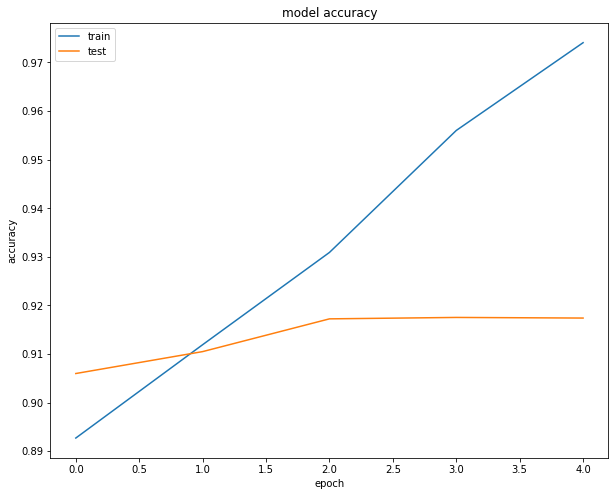

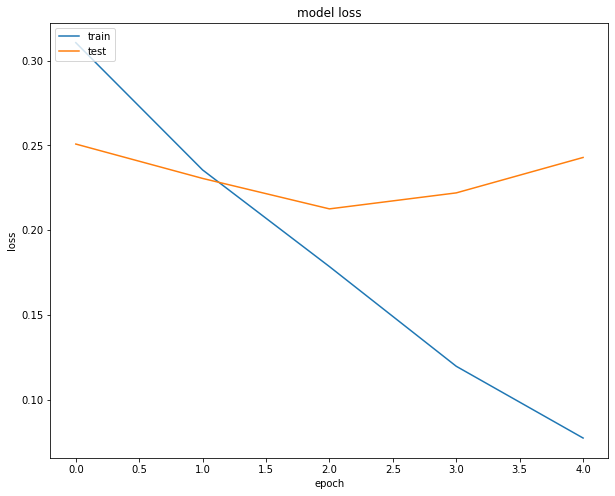


---------------------------------------------------------------------------------

Predict the genre tags of new movie's actors


Movie Title: Rotor DR1 

Predicted Genre labels: ['Action', 'Adventure', 'Drama'] 

With predicted probabilities: [0.2586932 0.6608739 0.9005501] 

The actual Genre labels: ['Family', 'Sci-Fi'] 

 ---------------------------------------------------------------------------------------------------------


Movie Title: Alles unter Kontrolle - Keiner blickt durch 

Predicted Genre labels: ['Action', 'Comedy', 'Drama'] 

With predicted probabilities: [0.21407267 0.24648482 0.27647692] 

The actual Genre labels: ['Adventure', 'Comedy'] 

 ---------------------------------------------------------------------------------------------------------


Movie Title: The Last King of Scotland 

Predicted Genre labels: ['Biography', 'Crime', 'Drama'] 

With predicted probabilities: [0.1688332  0.27069077 0.98840356] 

The actual Genre labels: ['Biography', 'Drama', 'History

In [149]:
class Config:
    MAX_FEATURES = 17500

    # Keras Classification Model variables
    BATCH_SIZE = 32
    NB_EPOCHS = 5
    EMB_DIMENSIONS = 100

stop_words = set(stopwords.words('english'))

lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    
    no_stopword_text = [word for word in text.split(' ') if not word in stop_words]
    
    lemmatized_text = [lemmatizer.lemmatize(word, pos='v') for word in no_stopword_text]
    
    lowercase_text = [word.lower() for word in lemmatized_text]
    
    return ' '.join(lowercase_text)

dataset['clean_plot_summary'] = dataset['Plot Summary'].apply(lambda x: preprocess_text(x))

print('\nThe first non-normalized line of the column Plot Summary: \n', dataset['Plot Summary'].iloc[0])
print('\nThe first normalized line of the column Plot Summary: \n', dataset['clean_plot_summary'].iloc[0])

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# Split the dataset into train & validation set
print("\n---------------------------------------------------------------------------------")
print("\nSplit the dataset into train & validation set")

X = dataset[['Movie Title', 'clean_plot_summary', 'Genres']]
y = genre_labels.values

print("\nFirst value of variable X:", X.iloc[0])

print("\nFirst value of variable y: \n", y[0])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# Tokenize the dataset
print("\n---------------------------------------------------------------------------------")
print("\nTokenize the dataset")

plot_tokenizer = Tokenizer(num_words=Config.MAX_FEATURES, lower=True, split=' ', oov_token = '<OOV>')
plot_tokenizer.fit_on_texts(list(X_train['clean_plot_summary']))

plot_tokenizer.word_index = {e:i for e,i in plot_tokenizer.word_index.items() if i <= Config.MAX_FEATURES} # <= because tokenizer is 1 indexed
plot_tokenizer.word_index[plot_tokenizer.oov_token] = Config.MAX_FEATURES + 1

X_train['plot_summary_seqs'] = plot_tokenizer.texts_to_sequences(X_train['clean_plot_summary'])
X_test['plot_summary_seqs'] = plot_tokenizer.texts_to_sequences(X_test['clean_plot_summary'])

# vocab_size_unique_words = len(plot_tokenizer.word_index) + 1 # I use the plus 1 since tokenizer starts from index 1
# print('The number of unique words is: {}'.format(vocab_size_unique_words))

vocab_size_frequent_words = len(plot_tokenizer.word_index) + 1 # I use the plus 1 since tokenizer starts from index 1
print('\nThe number of most frequent words is: {}'.format(vocab_size_frequent_words))

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# Specify the length of the maxlen variable
print("\n---------------------------------------------------------------------------------")
print("\nSpecify the length of the maxlen variable (insert into the padding execution)")

all_train_lengths = list(X_train.plot_summary_seqs.apply(len))

maxlen = int(np.percentile(all_train_lengths, q=90))

print('\nMax Length of each padding sequence: {}'.format(maxlen))

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

X_train_seq = pad_sequences(X_train['plot_summary_seqs'], padding='post', maxlen=maxlen)
X_test_seq = pad_sequences(X_test['plot_summary_seqs'], padding='post', maxlen=maxlen)

print("\n An example of an X_train sequence of words: {}".format(X_train_seq[0]))
print("\n An example of an X_test sequence of words: {}".format(X_test_seq[0]))

print('\nX train shape: {}'.format(X_train_seq.shape))
print('y train shape: {}'.format(y_train.shape))

assert len(X_train_seq) == len(y_train)

print('\nX test shape: {}'.format(X_test_seq.shape))
print('y test shape: {}'.format(y_test.shape))

assert len(X_test_seq) == len(y_test)

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# Setting the Keras Classification Model
print("\n---------------------------------------------------------------------------------")
print("\nCreate the Keras Classification Model")
print("\n")

model_2 = Sequential()

model_2.add(Embedding(input_dim=vocab_size_frequent_words + 1, # param input_dim: Total number of words to be used by the model
                      output_dim=Config.EMB_DIMENSIONS, # param output_dim: The size of the embeddings vector.
                      embeddings_initializer='uniform',
                      mask_zero=False,
                      input_length=maxlen))

model_2.add(Flatten())

model_2.add(Dense(32,
                  activation='relu'))

model_2.add(Dense(27,
                  activation='sigmoid'))

print(model_2.summary())

model_2.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['acc'])

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# Creating a callback function to save the model when a better validation loss is achieved
print("\n---------------------------------------------------------------------------------")
print("\nEnsemble a callback function")

weights_fname = 'model_plot.h5'

try:
    model_2.load_weights(weights_fname)
except:
    print('\nPre-trained weights not found. Fitting from start')
    pass

monitor_metric = 'val_loss'

callbacks = [
    EarlyStopping(monitor=monitor_metric,
                  patience=3,
                  verbose=1,
                  restore_best_weights=True),

    ModelCheckpoint(filepath=weights_fname,
                    monitor=monitor_metric,
                    verbose=1,
                    save_best_only=True,
                    save_weights_only=True)
]

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# Fitting the Keras classification model on the train dataset
print("\n---------------------------------------------------------------------------------")
print("\nFit the keras classification model")
print("\n")

s = time()

fit_model_2 = model_2.fit(X_train_seq, y_train, 
                          epochs=Config.NB_EPOCHS,
                          verbose=2,
                          batch_size=Config.BATCH_SIZE,
                          validation_data=(X_test_seq, y_test),
                          callbacks=callbacks)

duration = time() - s
print("\nTraining time finished. Duration {} secs".format(duration))

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# Save the trained model
print("\n---------------------------------------------------------------------------------")
print("\nSave the Model")

model_json = model_2.to_json()

with open("model_plot.json", "w") as json_file:
    json_file.write(model_json)

# serialize weights to HDF5
model_2.save_weights("model_plot.h5")
print("\nModel's weights are saved")

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# Extract the word embeddings of each word
print("\n---------------------------------------------------------------------------------")
print("\nExtract the word embeddings")

embeddings_plot = model_2.layers[0].get_weights()[0]

words_embeddings_plot = {w:embeddings_plot[idx] for w, idx in plot_tokenizer.word_index.items() if idx <= Config.MAX_FEATURES+1}
print("\nThe word embedding vector of the word 'marine' is:\n\n", words_embeddings_plot['marine'])

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# Assign the word embeddings to each different plot symmary
print("\n---------------------------------------------------------------------------------")
print("\nAssign the word embeddings to each different plot symmary")

average_vector_list_plot = []

min_vector_list_plot = []

max_vector_list_plot = []

plot_embeddings_list = []

for i in tqdm(range(len(dataset.index))):
    plot = dataset["clean_plot_summary"].iloc[i]
    
    plot_split = plot.split(' ')
    
    assert [word.islower() for word in plot_split]
    
    plot_embeddings_list.append([words_embeddings_plot[word] if word in words_embeddings_plot else words_embeddings_plot['<OOV>'] for word in plot_split])
    
dataset['plot_embeddings_list'] = plot_embeddings_list

for i in tqdm(range(len(dataset.index))):
    plot_embeddings = dataset["plot_embeddings_list"].iloc[i]
    
    minimum = np.min([element for element in plot_embeddings], axis=0)
    maximum = np.max([element for element in plot_embeddings], axis=0)
    average = np.mean([element for element in plot_embeddings], axis=0)
    
    min_vector_list_plot.append(minimum)
    max_vector_list_plot.append(maximum)
    average_vector_list_plot.append(average)

dataset['minimum_plot_vectors'] = min_vector_list_plot
dataset['maximum_plot_vectors'] = max_vector_list_plot
dataset['average_plot_vectors'] = average_vector_list_plot

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# Evaluate the model
print("\n---------------------------------------------------------------------------------")
print("\nEvaluate the classification model")
print("\n")

score = model_2.evaluate(X_test_seq, y_test, verbose=0)

print('Test Score:', score[0])

print('\nTest Accuracy:', score[1])

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# Plot keras model accuracy & loss
print("\n---------------------------------------------------------------------------------")
print("\nPlot the model's accuracy & loss")

plt.plot(fit_model_2.history['acc'])
plt.plot(fit_model_2.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(fit_model_2.history['loss'])
plt.plot(fit_model_2.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

# Predict the genre tags on new data
print("\n---------------------------------------------------------------------------------")
print("\nPredict the genre tags of new movie's actors")

def predict_the_genre_labels_from_plot(indx):
    
    # get the predicted genre tags
    
    test_sequence = X_test_seq[indx:indx+1]
    
    text_prediction = model_2.predict(test_sequence)
    
    [float(i) for i in text_prediction[0]]
    
    tag_probabilities = text_prediction[0][np.argsort(text_prediction[0])[-3:]]
    
    indexes = np.argsort(text_prediction[0])[::-1][:3]

    predicted_tags = []
    
    for i, tag in enumerate(genres_list):
        if i in indexes:
            predicted_tags.append(genres_list[i])
    
    # -----------------------------------------------------------------------------------
    
    return print('\n\nMovie Title: {}'.format(X_test['Movie Title'].iloc[indx]), '\n\nPredicted Genre labels: {}'.format(predicted_tags), '\n\nWith predicted probabilities: {}'.format(tag_probabilities), '\n\nThe actual Genre labels: {}'.format(X_test['Genres'].iloc[indx]), "\n\n", "---------------------------------------------------------------------------------------------------------")

random_numbers = random.sample(range(1, 2028), 5)

for i in random_numbers:
    predict_the_genre_labels_from_plot(i)

#### Model 3: Combined Features


The first non-normalized line of the column Combined Features: 
 avatar sam worthington zoe saldana sigourney weaver stephen lang michelle rodriguez giovanni ribisi joel david moore cch pounder wes studi laz alonso dileep rao matt gerald sean anthony moran jason whyte scott lawrence james cameron a paraplegic marine dispatched to the moon pandora on a unique mission becomes torn between following his orders and protecting the world he feels is his home avatar future marine native paraplegic action adventure fantasy

The first normalized line of the column Combined Features: 
 avatar sam worthington zoe saldana sigourney weaver stephen lang michelle rodriguez giovanni ribisi joel david moore cch pounder wes studi laz alonso dileep rao matt gerald sean anthony moran jason whyte scott lawrence jam cameron paraplegic marine dispatch moon pandora unique mission become tear follow order protect world feel home avatar future marine native paraplegic action adventure fantasy

----------------

c:\users\spano\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\users\spano\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



The number of most frequent words is: 20001

---------------------------------------------------------------------------------

Specify the length of the maxlen variable (insert into the padding execution)

Max Length of each padding sequence: 69

 An example of an X_train sequence of words: [ 2197 13540 13540 20001   803 16386  1424 16387  7576 16386  1193    30
   303   308 20001    57 16388  2009   765 20001 20001   149 16389 16390
   291    11  2769   186  4697  3825 20001  1507 20001    11  2770   569
    69  8295    70   159  1849   981   728   408   188    14 16391  4941
   405  1060   982   982  8295    32  1765  6966    28   252    32 16392
    40     0     0     0     0     0     0     0     0]

 An example of an X_test sequence of words: [20001  2953  2058  5489    53  2077     4   971   128  5155   316  3897
  1225  7529   133  9182   146   641  2797  2743    19 10875   677   222
    15  6815  4118 20001   103   307   429   283  9328     5  7765  4872
   534    26   161  5

100%|██████████████████████████████████████████████████████████████████████████| 10139/10139 [00:01<00:00, 7622.86it/s]



---------------------------------------------------------------------------------

Evaluate the classification model



Test Score: 0.06278043991979762

Test Accuracy: 0.978596

---------------------------------------------------------------------------------

Plot the model's accuracy & loss


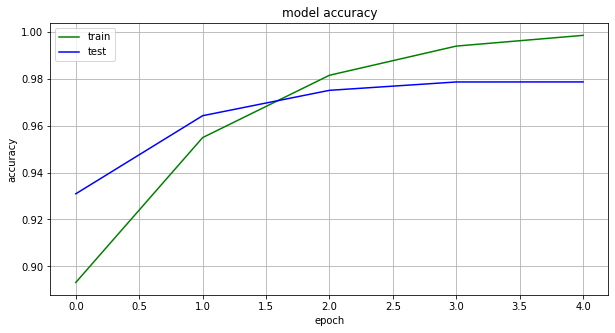

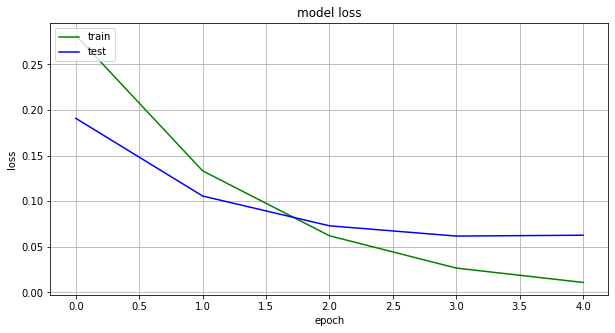


---------------------------------------------------------------------------------

Predict the genre tags of new movie plots


Movie Title: The Oogieloves in the Big Balloon Adventure 

Predicted Genre labels: ['Adventure', 'Family', 'Fantasy'] 

With predicted probabilities: [0.15745357 0.5977738  0.7356074 ] 

The actual Genre labels: ['Adventure', 'Family', 'Fantasy'] 

 ---------------------------------------------------------------------------------------------------------


Movie Title: Shawn's Dark Xmas 

Predicted Genre labels: ['Animation', 'Sci-Fi', 'Short'] 

With predicted probabilities: [0.03811789 0.03953987 0.07805213] 

The actual Genre labels: ['Short', 'Action', 'Adventure'] 

 ---------------------------------------------------------------------------------------------------------


Movie Title: The Charge of the Light Brigade 

Predicted Genre labels: ['Action', 'Adventure', 'Drama'] 

With predicted probabilities: [0.18592566 0.85103786 0.9824213 ] 

The actual Ge

In [152]:
class Config:
    MAX_FEATURES = 20000

    # Keras Classification Model variables
    BATCH_SIZE = 32
    NB_EPOCHS = 5
    EMB_DIMENSIONS = 100

stop_words = set(stopwords.words('english'))

lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    no_stopword_text = [word for word in text.split(' ') if not word in stop_words]
    
    lemmatized_text = [lemmatizer.lemmatize(word, pos='v') for word in no_stopword_text]
    
    lowercase_text = [word.lower() for word in lemmatized_text]
    
    return ' '.join(lowercase_text)

dataset['clean_combined_features'] = dataset['Combined_Features'].apply(lambda x: preprocess_text(x))

print('\nThe first non-normalized line of the column Combined Features: \n', dataset['Combined_Features'].iloc[0])
print('\nThe first normalized line of the column Combined Features: \n', dataset['clean_combined_features'].iloc[0])

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# Split the dataset into train & validation set
print("\n---------------------------------------------------------------------------------")
print("\nSplit the dataset into train & validation set")

X = dataset[['Movie Title', 'clean_combined_features', 'Genres']]
y = genre_labels.values

print("\nFirst value of variable X:", X.iloc[0])

print("\nFirst value of variable y: \n", y[0])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# Tokenize the dataset
print("\n---------------------------------------------------------------------------------")
print("\nTokenize the dataset")

combined_features_tokenizer = Tokenizer(num_words=Config.MAX_FEATURES, lower=True, split=' ', oov_token = '<OOV>')
combined_features_tokenizer.fit_on_texts(list(X_train['clean_combined_features']))

combined_features_tokenizer.word_index = {e:i for e,i in combined_features_tokenizer.word_index.items() if i <= Config.MAX_FEATURES} # <= because tokenizer is 1 indexed
combined_features_tokenizer.word_index[combined_features_tokenizer.oov_token] = Config.MAX_FEATURES + 1

X_train['combined_features_seqs'] = combined_features_tokenizer.texts_to_sequences(X_train['clean_combined_features'])
X_test['combined_features_seqs'] = combined_features_tokenizer.texts_to_sequences(X_test['clean_combined_features'])

vocab_size_frequent_words = len(combined_features_tokenizer.word_index) + 1 # I use the plus 1 since tokenizer starts from index 1
print('\nThe number of most frequent words is: {}'.format(vocab_size_frequent_words))

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# Specify the length of the maxlen variable
print("\n---------------------------------------------------------------------------------")
print("\nSpecify the length of the maxlen variable (insert into the padding execution)")

all_train_lengths =  list(X_train.combined_features_seqs.apply(len))

maxlen = int(np.percentile(all_train_lengths, q=90))

print('\nMax Length of each padding sequence: {}'.format(maxlen))

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

X_train_seq = pad_sequences(X_train['combined_features_seqs'], padding='post', maxlen=maxlen)
X_test_seq = pad_sequences(X_test['combined_features_seqs'], padding='post', maxlen=maxlen)

print("\n An example of an X_train sequence of words: {}".format(X_train_seq[0]))
print("\n An example of an X_test sequence of words: {}".format(X_test_seq[0]))

print('\nX train shape: {}'.format(X_train_seq.shape))
print('y train shape: {}'.format(y_train.shape))

assert len(X_train_seq) == len(y_train)

print('\nX test shape: {}'.format(X_test_seq.shape))
print('y test shape: {}'.format(y_test.shape))

assert len(X_test_seq) == len(y_test)

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# Setting the Keras Classification Model
print("\n---------------------------------------------------------------------------------")
print("\nCreate the Keras Classification Model")
print("\n")

model_3 = Sequential()

model_3.add(Embedding(input_dim=vocab_size_frequent_words + 1, # param input_dim: Total number of words to be used by the model
                      output_dim=Config.EMB_DIMENSIONS, # param output_dim: The size of the embeddings vector.
                      embeddings_initializer='uniform',
                      mask_zero=False,
                      input_length=maxlen))

model_3.add(Flatten())

model_3.add(Dense(32,
                  activation='relu'))

model_3.add(Dense(27,
                  activation='sigmoid'))

print(model_3.summary())

model_3.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['acc'])

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# Creating a callback function to save the model when a better validation loss is achieved
print("\n---------------------------------------------------------------------------------")
print("\nEnsemble a callback function")

weights_fname = 'model_combined_features.h5'

try:
    model_3.load_weights(weights_fname)
except:
    print('Pre-trained weights not found. Fitting from start')
    pass

monitor_metric = 'val_loss'

callbacks = [
    EarlyStopping(monitor=monitor_metric,
                  patience=3,
                  verbose=1,
                  restore_best_weights=True),

    ModelCheckpoint(filepath=weights_fname,
                    monitor=monitor_metric,
                    verbose=1,
                    save_best_only=True,
                    save_weights_only=True)
]

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# Fitting the Keras classification model on the train dataset
print("\n---------------------------------------------------------------------------------")
print("\nFit the keras classification model")
print("\n")

s = time()

fit_model_3 = model_3.fit(X_train_seq, y_train, 
                          epochs=Config.NB_EPOCHS,
                          verbose = 2,
                          batch_size=Config.BATCH_SIZE,
                          validation_data=(X_test_seq, y_test),
                          callbacks=callbacks)

duration = time() - s
print("Training time finished. Duration {} secs".format(duration))

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# Save the trained model
print("\n---------------------------------------------------------------------------------")
print("\nSave the Model")

model_json = model_3.to_json()

with open("model_combined_features.json", "w") as json_file:
    json_file.write(model_json)

# serialize weights to HDF5
model_3.save_weights("model_combined_features.h5")
print("\nModel's weights are saved")

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# Extract the word embeddings of each word
print("\n---------------------------------------------------------------------------------")
print("\nExtract the word embeddings")

embeddings_combined_features = model_3.layers[0].get_weights()[0]

words_embeddings_combined_features = {w:embeddings_combined_features[idx] for w, idx in combined_features_tokenizer.word_index.items() if idx <= Config.MAX_FEATURES+1}
print("\nThe word embedding vector of the word 'spectre' is:\n\n", words_embeddings_combined_features['spectre'])

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# Assign the word embeddings to each different plot symmary
print("\n---------------------------------------------------------------------------------")
print("\nAssign the word embeddings to each different plot symmary")

average_vector_list_combined_features = []

min_vector_list_combined_features = []

max_vector_list_combined_features = []

combined_features_embeddings_list = []

for i in tqdm(range(len(dataset.index))):
    
    combined_features = dataset["clean_combined_features"].iloc[i]
    
    combined_features_split = combined_features.split(' ')
    
    assert [word.islower() for word in combined_features_split]
    
    combined_features_embeddings_list.append([words_embeddings_combined_features[word] if word in words_embeddings_combined_features else words_embeddings_combined_features['<OOV>'] for word in combined_features_split])
    
dataset['combined_features_embeddings_list'] = combined_features_embeddings_list

for i in tqdm(range(len(dataset.index))):
    combined_features_embeddings = dataset["combined_features_embeddings_list"].iloc[i]
    
    minimum = np.min([element for element in combined_features_embeddings], axis=0)
    maximum = np.max([element for element in combined_features_embeddings], axis=0)
    average = np.mean([element for element in combined_features_embeddings], axis=0)
    
    min_vector_list_combined_features.append(minimum)
    max_vector_list_combined_features.append(maximum)
    average_vector_list_combined_features.append(average)

dataset['minimum_combined_features_vectors'] = min_vector_list_combined_features
dataset['maximum_combined_features_vectors'] = max_vector_list_combined_features
dataset['average_combined_features_vectors'] = average_vector_list_combined_features

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# Evaluate the model
print("\n---------------------------------------------------------------------------------")
print("\nEvaluate the classification model")
print("\n")

score = model_3.evaluate(X_test_seq, y_test, verbose=0)

print('\nTest Score:', score[0])

print('\nTest Accuracy:', score[1])

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# Plot keras model accuracy & loss
print("\n---------------------------------------------------------------------------------")
print("\nPlot the model's accuracy & loss")

rcParams['figure.figsize'] = 10, 5

plt.plot(fit_model_3.history['acc'] , 'g')
plt.plot(fit_model_3.history['val_acc'] , 'b')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid(True)
plt.show()

rcParams['figure.figsize'] = 10, 5

plt.plot(fit_model_3.history['loss'] , 'g')
plt.plot(fit_model_3.history['val_loss'] , 'b')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid(True)
plt.show()

# Predict the genre tags on new data
print("\n---------------------------------------------------------------------------------")
print("\nPredict the genre tags of new movie plots")

def predict_the_genre_labels_from_combined_features(indx):
    
    # get the predicted genre tags
    
    test_sequence = X_test_seq[indx:indx+1]
    
    text_prediction = model_3.predict(test_sequence)
    
    [float(i) for i in text_prediction[0]]
    
    tag_probabilities = text_prediction[0][np.argsort(text_prediction[0])[-3:]]
    
    indexes = np.argsort(text_prediction[0])[::-1][:3]

    predicted_tags = []
    
    for i, tag in enumerate(genres_list):
        if i in indexes:
            predicted_tags.append(genres_list[i])
    
    # -----------------------------------------------------------------------------------
    
    return print('\n\nMovie Title: {}'.format(X_test['Movie Title'].iloc[indx]), '\n\nPredicted Genre labels: {}'.format(predicted_tags), '\n\nWith predicted probabilities: {}'.format(tag_probabilities), '\n\nThe actual Genre labels: {}'.format(X_test['Genres'].iloc[indx]), "\n\n", "---------------------------------------------------------------------------------------------------------")

random_numbers = random.sample(range(1, 2028), 5)

for i in random_numbers:
    predict_the_genre_labels_from_combined_features(i)

In [ ]:
# Ask Louridas about this! 
# Fit on sequences does work properly


# def predict_the_genre_labels(text, indx):
#     text = preprocess_text(text)
    
#     print(text)
    
#     print(type(text))

#     combined_features_tokenizer.fit_on_texts(text)
    
#     text_sequence= combined_features_tokenizer.texts_to_sequences(text)
    
#     print('\n', text_sequence)
    
#     print("\nLength of the sequence: {}".format(len(text_sequence)))
    
#     text_sequence_padding = pad_sequences(text_sequence, padding='post', maxlen=maxlen)
    
#     print('\n', text_sequence_padding[0])
    
#     print("\nLength of the sequence: {}".format(len(text_sequence_padding)))
    
#     text_prediction = model_3.predict(text_sequence)
    
#     [float(i) for i in text_prediction[0]]

#     indexes = np.argsort(prediction[0])[::-1][:3]

#     print('\nGenre labels:', y_test.iloc[indx].index[[indexes[0], indexes[1], indexes[2]]])
    
#     top_three_labels = y_test.iloc[indx].index[[indexes[0], indexes[1], indexes[2]]]
    
#     return text_prediction

In [153]:
dataset.columns

Index(['Movie Title', 'IMDB Url', 'IMDB Rating', 'Actors', 'Director',
       'Plot Summary', 'Plot Keywords', 'Genres', 'Combined_Features',
       'Actors_Embeddings', 'Action', 'Adult', 'Adventure', 'Animation',
       'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family',
       'Fantasy', 'Film-Noir', 'History', 'Horror', 'Music', 'Musical',
       'Mystery', 'News', 'Reality-TV', 'Romance', 'Sci-Fi', 'Short', 'Sport',
       'Talk-Show', 'Thriller', 'War', 'Western', 'clean_actors',
       'actors_embeddings_list', 'minimum_cast_vectors',
       'maximum_cast_vectors', 'average_cast_vectors', 'clean_plot_summary',
       'plot_embeddings_list', 'minimum_plot_vectors', 'maximum_plot_vectors',
       'average_plot_vectors', 'clean_combined_features',
       'combined_features_embeddings_list',
       'minimum_combined_features_vectors',
       'maximum_combined_features_vectors',
       'average_combined_features_vectors'],
      dtype='object')

In [165]:
dataset_with_embeddings = dataset[['Movie Title', 'IMDB Url', 'IMDB Rating', 'Actors', 'Plot Summary', 'Combined_Features', 'Genres', 
                                   'clean_actors', 'clean_plot_summary', 'clean_combined_features',
                                   'actors_embeddings_list','minimum_cast_vectors', 'maximum_cast_vectors', 'average_cast_vectors', 
                                   'plot_embeddings_list', 'minimum_plot_vectors', 'maximum_plot_vectors', 'average_plot_vectors',
                                   'combined_features_embeddings_list', 'minimum_combined_features_vectors', 'maximum_combined_features_vectors','average_combined_features_vectors']]

dataset_with_embeddings.head()

In [155]:
keras_embeddings_array_cast = np.hstack([dataset_with_embeddings['average_cast_vectors'].apply(pd.Series).values,
                                         dataset_with_embeddings['minimum_cast_vectors'].apply(pd.Series).values,
                                         dataset_with_embeddings['maximum_cast_vectors'].apply(pd.Series).values])

keras_embeddings_array_plot = np.hstack([dataset_with_embeddings['average_plot_vectors'].apply(pd.Series).values,
                                         dataset_with_embeddings['minimum_plot_vectors'].apply(pd.Series).values,
                                         dataset_with_embeddings['maximum_plot_vectors'].apply(pd.Series).values])

keras_embeddings_array_combined_features = np.hstack([dataset_with_embeddings['average_combined_features_vectors'].apply(pd.Series).values,
                                                     dataset_with_embeddings['minimum_combined_features_vectors'].apply(pd.Series).values,
                                                     dataset_with_embeddings['maximum_combined_features_vectors'].apply(pd.Series).values])

keras_embeddings_array_cast_plot_combined_features = np.hstack([keras_embeddings_array_cast, 
                                                                keras_embeddings_array_plot, 
                                                                keras_embeddings_array_combined_features])

print("Shape of the Actors embeddings: {}".format(keras_embeddings_array_cast.shape))
print("\nShape of the Plot Summary embeddings: {}".format(keras_embeddings_array_plot.shape))
print("\nShape of the Combined Features embeddings: {}".format(keras_embeddings_array_combined_features.shape))
print("\nShape of the concatenated embeddings(cast, plot, combined features): {}".format(keras_embeddings_array_cast_plot_combined_features.shape))

Shape of the Actors embeddings: (10139, 300)

Shape of the Plot Summary embeddings: (10139, 300)

Shape of the Combined Features embeddings: (10139, 300)

Shape of the concatenated embeddings(cast, plot, combined features): (10139, 900)


In [156]:
with open('keras_embeddings_array_cast_09112019.pkl', 'wb') as f:
    pickle.dump(keras_embeddings_array_cast, f)
    
with open('keras_embeddings_array_plot_09112019.pkl', 'wb') as f:
    pickle.dump(keras_embeddings_array_plot, f)
    
with open('keras_embeddings_array_combined_features_09112019.pkl', 'wb') as f:
    pickle.dump(keras_embeddings_array_combined_features, f)
    
with open('keras_embeddings_array_cast_plot_features_09112019.pkl', 'wb') as f:
    pickle.dump(keras_embeddings_array_cast_plot_combined_features, f)

#### Pickle the dataset with the word embeddings

In [170]:
dataset_with_embeddings.to_pickle('dataset_part_3_09112019.pkl')

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

### From this part and below, I will need to discuss further steps with professor Louridas!

### Next Steps

* Visualize the movie title of a movie based on the trained words embeddings of plot, cast, combined features

* Hyperparameter tuning on the keras classification models

* Fine-tuning based on pretrained embeddings from GloVe

#### Visualize the distances among movie titles based on the trained embeddings

#### Plot Summary vectors

In [ ]:
# Word embeddings of the plot summary

plot_embeddings = []

for i in tqdm(range(len(dataset.index))):
    plot = dataset["clean_plot_summary"].iloc[i]
    
    movie_title = dataset["Movie Title"].iloc[i]
    
    plot_split = plot.split(' ')
    
    assert [word.islower() for word in plot_split]
    
    plot_embeddings.append([(movie_title, words_embeddings_plot[word]) if word in words_embeddings_plot else words_embeddings_plot['<OOV>'] for word in plot_split])

In [23]:
# Word embeddings of the plot summary

plot_embeddings = []

for i in tqdm(range(len(dataset.index))):
    plot = dataset["clean_plot_summary"].iloc[i]
    
    movie_title = dataset["Movie Title"].iloc[i]
    
    plot_split = plot.split(' ')
    
    assert [word.islower() for word in plot_split]
    
    plot_embeddings.append([(movie_title, words_embeddings_plot[item])for item in plot_split if item in words_embeddings_plot])

# item_vectors = [(item, words_embeddings_plot[item])for item in plot_split if item in words_embeddings_plot]

100%|█████████████████████████████████████████████████████████████████████████| 10602/10602 [00:00<00:00, 32925.73it/s]


In [21]:
# Word embeddings of the plot summary

plot_embeddings = [(item, words_embeddings_plot[item]) for item in dataset["clean_plot_summary"] if item in words_embeddings_plot]

In [26]:
plot_embeddings[1]

[("Pirates of the Caribbean: At World's End",
  array([ 0.04113564, -0.04406666, -0.0673745 , -0.00874797,  0.05740562,
         -0.13056004,  0.08970004, -0.13624181, -0.11925312,  0.16642973,
         -0.01914988,  0.08958084, -0.09654929,  0.14490011,  0.01095328,
          0.0547801 , -0.0524132 , -0.01776052, -0.05707503, -0.0052028 ,
         -0.08470128,  0.10677217, -0.04327436,  0.16428225, -0.05860477,
          0.01524828,  0.1252242 , -0.1381478 ,  0.07708687,  0.02625908,
         -0.09369349, -0.00790034, -0.02119448, -0.19022264, -0.18552704,
          0.00617033,  0.08651023, -0.15283695, -0.05706623, -0.09653908,
          0.04834247, -0.14848576,  0.14884463, -0.24576586,  0.17710187,
         -0.05304932,  0.05875471, -0.12259176,  0.06352759,  0.12022086,
         -0.20089743,  0.01504979, -0.05595682, -0.20771545, -0.03411673,
         -0.07865473, -0.04425288, -0.07212084,  0.13362814, -0.07960351,
          0.06212578, -0.09676912,  0.09223007, -0.05978144,  0.06

In [28]:
from sklearn.manifold import TSNE

vectors = np.asarray([x[0][1] for x in plot_embeddings])

lengths = np.linalg.norm(vectors, axis = 1)

norm_vectors = (vectors.T / lengths).T

tsne = TSNE(n_components = 2, perplexity=1, verbose = 2).fit_transform(norm_vectors)

[t-SNE] Computing 4 nearest neighbors...
[t-SNE] Indexed 10602 samples in 0.099s...
[t-SNE] Computed neighbors for 10602 samples in 7.301s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10602
[t-SNE] Computed conditional probabilities for sample 2000 / 10602
[t-SNE] Computed conditional probabilities for sample 3000 / 10602
[t-SNE] Computed conditional probabilities for sample 4000 / 10602
[t-SNE] Computed conditional probabilities for sample 5000 / 10602
[t-SNE] Computed conditional probabilities for sample 6000 / 10602
[t-SNE] Computed conditional probabilities for sample 7000 / 10602
[t-SNE] Computed conditional probabilities for sample 8000 / 10602
[t-SNE] Computed conditional probabilities for sample 9000 / 10602
[t-SNE] Computed conditional probabilities for sample 10000 / 10602
[t-SNE] Computed conditional probabilities for sample 10602 / 10602
[t-SNE] Mean sigma: 0.000000
[t-SNE] Computed conditional probabilities in 0.113s
[t-SNE] Iteration 50: error = 166.470

In [30]:
x = tsne[:,0]
y = tsne[:,1]

fig, ax = plt.subplots()
ax.scatter(x, y)

for item, x1, y1 in zip(plot_embeddings, x, y):
    ax.annotate(item[0][0], (x1, y1))
    
plt.show()

KeyboardInterrupt: 

#### End of part 3 (Keras Text Classification & Word Embeddings)